In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
marks_file_path = Path("..","data","processed","marks_data.parquet")#songs_df = pd.read_parquet(marks_file_path)
exercise_data_path = Path("..","data","processed","chord_exercises.parquet")
exercise_df = pd.read_parquet(exercise_data_path)
prod_data_path = Path("..","data","processed","prod_data.parquet")
prod_data = pd.read_parquet(prod_data_path)

Running PCA to reduce from 3024 → 100 dimensions...
PCA complete. Shape: (168630, 100)
Explained variance ratio (first 10 comps): [0.13954444 0.10823043 0.06132166 0.04828419 0.03467049 0.03131611
 0.02613195 0.02348917 0.02307746 0.02195262]
Running clustering for different k values...
k=2 → inertia=695637.38, silhouette=0.1310
k=3 → inertia=644517.48, silhouette=0.1130
k=4 → inertia=618581.60, silhouette=0.1005
k=5 → inertia=585383.74, silhouette=0.1049
k=6 → inertia=566055.58, silhouette=0.1035
k=7 → inertia=545570.39, silhouette=0.1041
k=8 → inertia=536465.33, silhouette=0.1070
k=9 → inertia=532107.15, silhouette=0.0945
k=10 → inertia=528159.87, silhouette=0.0938
k=11 → inertia=517973.04, silhouette=0.0972
k=12 → inertia=510710.85, silhouette=0.0988
k=13 → inertia=505189.73, silhouette=0.1004
k=14 → inertia=498099.02, silhouette=0.1037
k=15 → inertia=485065.30, silhouette=0.0970
k=16 → inertia=476857.74, silhouette=0.0964
k=17 → inertia=472460.50, silhouette=0.0972
k=18 → inertia=4

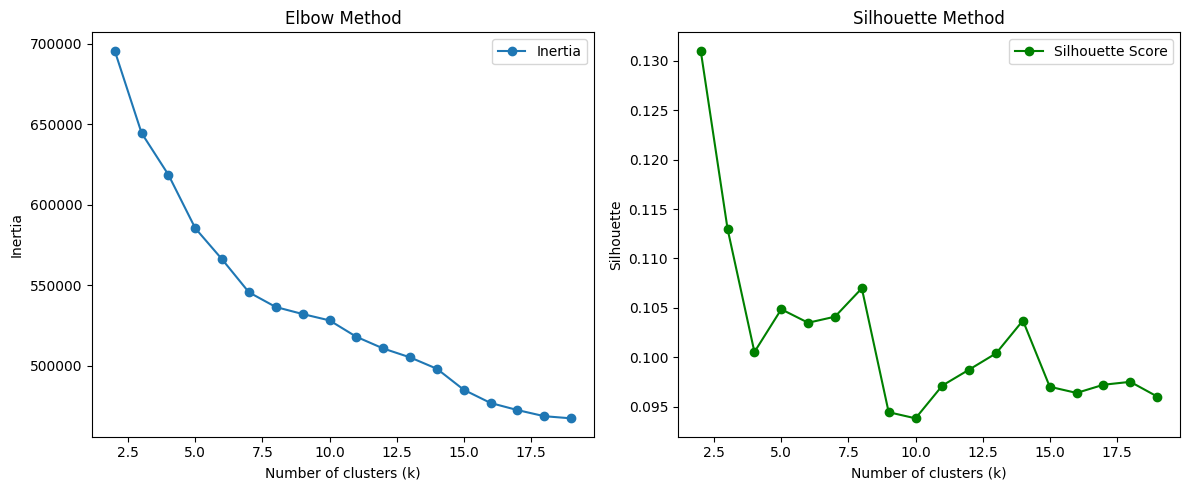

Final model trained with k=5
Centroids shape: (5, 100)


In [6]:

X = np.array(songs_df['feature_vector'].to_list())

# --------------------------
# Step 1: Dimensionality Reduction with PCA
pca_components = 100  # adjust based on explained variance
print(f"Running PCA to reduce from {X.shape[1]} → {pca_components} dimensions...")
pca = PCA(n_components=pca_components, random_state=42)
X_reduced = pca.fit_transform(X)

print(f"PCA complete. Shape: {X_reduced.shape}")
print(f"Explained variance ratio (first 10 comps): {pca.explained_variance_ratio_[:10]}")

# --------------------------
# Step 2: Find optimal K with inertia + silhouette
inertias = []
silhouettes = []
K_range = range(2, 20)  # You can extend this if needed

print("Running clustering for different k values...")
for k in K_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=2048, n_init="auto")
    labels = kmeans.fit_predict(X_reduced)
    
    inertia = kmeans.inertia_
    inertias.append(inertia)
    
    sil_score = silhouette_score(X_reduced, labels, sample_size=10000, random_state=42)
    silhouettes.append(sil_score)
    
    print(f"k={k} → inertia={inertia:.2f}, silhouette={sil_score:.4f}")

# --------------------------
# Step 3: Plot inertia & silhouette to decide optimal k
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertias, 'o-', label='Inertia')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.legend()

plt.subplot(1,2,2)
plt.plot(K_range, silhouettes, 'o-', color='green', label='Silhouette Score')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette")
plt.title("Silhouette Method")
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------
# Step 4: Fit final model with optimal k (replace with your choice)
optimal_k = 5  # <-- set manually after looking at the plots
final_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=2048, n_init="auto")
final_labels = final_kmeans.fit_predict(X_reduced)

# Get final centroids in PCA space
centroids = final_kmeans.cluster_centers_

print(f"Final model trained with k={optimal_k}")
print("Centroids shape:", centroids.shape)
